# Sistemas dinámicos

## Ejercicio 4
---

Se desea simular la evolución de una epidemia utilizando el modelo S.I.R.
Se conoce que inicialmente el 3% de la población se encuentra infectada, toda la población es susceptible de contagiarse, la tasa de transmisión β=0,27, y la tasa de recuperación γ = 0,043
Se pide:
- Implementar el modelo SIR correspondiente.
- Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución de la epidemia.
- Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de asistencia médica. ¿Qué parámetros modifica? ¿Por qué?

### Import de las librerías a utilizar.

In [421]:
import matplotlib.pyplot as plt
import numpy as np

## Implementar el modelo SIR correspondiente.

### Se declaran las variables a utilizar en el modelo:
- **susceptibles0**: Los susceptibles son el 97% de la población iniicialmente.
- **infectados0**: Los infectados inicialmente son el 3% de la población inicialmente.
- **recuperados0**: Los recuperados son 0 inicialmente.
- **beta**: Tasa de transmisión β. 0.27 en este ejemplo.
- **gamma**: Tasa de recuperación γ. 0.043 en este ejemplo.
- **sistemaSaludMax**: Capacidad máxima de asistencia del sistema de salud. 30% en este ejemplo.
- **infectadosMinimo**: Porcentaje mínimo de infectados: Si la cantidad de infectados es menor a este número se considera que se terminó la pandemia. 0.1% en este ejemplo.

In [422]:
susceptibles0 = 0.97
infectados0 = 0.03
recuperados0 = 0
beta = 0.27
gamma = 0.043
sistemaSaludMax = 0.3
infectadosMinimo = 0.001

### Funciones que definen al modelo SIR.
Devuelven el nuevo valor para cada población y no su incremento/decremento.

In [423]:
def modeloSIRSusceptibles(susceptibles, infectados, beta):
    return susceptibles - beta * susceptibles * infectados

def modeloSIRInfectados(susceptibles, infectados, beta, gamma):
    return infectados + beta * susceptibles * infectados - gamma * infectados

def modeloSIRRecuperados(recuperados, infectados, gamma):
    return recuperados + gamma * infectados

def modeloSIRSimular(susceptibles, infectados, recuperados, beta, gamma, infectadosMinimo):
    # Creo las variables para cada población copiandola de los parámetros.
    s = susceptibles
    i = infectados
    r = recuperados
    
    # Creo las listas para cada población iniciandola con los valores iniciales de cada población
    listaSusceptibles = [ susceptibles ]
    listaInfectados = [ infectados ]
    listaRecuperados = [ recuperados ]
    
    # Creo la variable tiempo, ya hice una iteración que es la iteración inicial.
    contadorTiempo = 1

    while i > infectadosMinimo:
        susceptiblesActuales = s
        infectadosActuales = i
        recuperadosActuales = r
    
        s = modeloSIRSusceptibles(susceptiblesActuales, infectadosActuales, beta)
        listaSusceptibles.append(s)
        
        i = modeloSIRInfectados(susceptiblesActuales, infectadosActuales, beta, gamma)
        listaInfectados.append(i)
    
        r = modeloSIRRecuperados(recuperadosActuales, infectadosActuales, gamma)
        listaRecuperados.append(r)
    
        contadorTiempo = contadorTiempo + 1
    
    return (contadorTiempo, (listaSusceptibles, listaInfectados, listaRecuperados))

### Simulación de la pandemia.
Cabe aclarar que en este modelo consideramos a los recuperados como aquellas personas que se recuperan del virus o que también fallecen para que la población total se mantenga constante.

In [424]:
simulacion = modeloSIRSimular(susceptibles0, infectados0, recuperados0, beta, gamma, infectadosMinimo)

susceptibles = simulacion[1][0]
infectados = simulacion[1][1]
recuperados = simulacion[1][2]
tiempo = simulacion[0]

In [425]:
infectados[tiempo - 1]

0.0009851183627307425

## Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución de la epidemia.

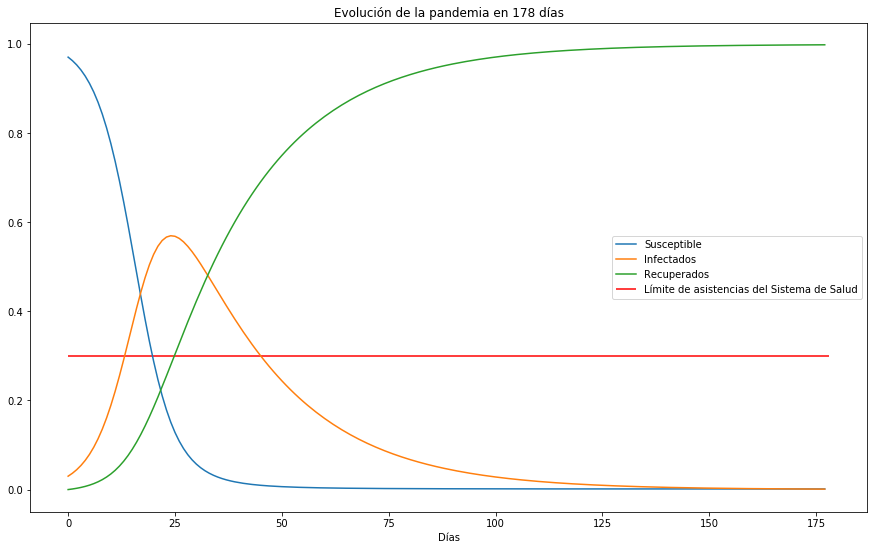

In [426]:
plt.figure(figsize=(15, 9))
plt.title('Evolución de la pandemia en {} días'.format(tiempo))
plt.plot(susceptibles)
plt.plot(infectados)
plt.plot(recuperados)
plt.hlines(0.3, 0, tiempo, colors='r', linestyles='solid', label='Límite de asistencia del sistema de salud')
plt.legend(['Susceptible', 'Infectados', 'Recuperados', 'Límite de asistencias del Sistema de Salud'])
plt.xlabel('Días')
plt.show()

## Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de asistencia médica. ¿Qué parámetros modifica? ¿Por qué?

Como podemos ver, la cantidad de infectados supera al límite de la población que el sistema de salud puede asistir:

In [427]:
max(infectados)

0.5693610124630719

### Tomando medidas para reducir el valor de β.
Para reducir el valor de β se puede implementar una cuarentena en donde se reduce el número de contactos existente entre los individuos de la población.\
Se realiza una nueva simulación con un valor de β diferente:

In [428]:
simulacionBeta = modeloSIRSimular(susceptibles0, infectados0, recuperados0, 0.123, gamma, infectadosMinimo)

susceptiblesBeta = simulacionBeta[1][0]
infectadosBeta = simulacionBeta[1][1]
recuperadosBeta = simulacionBeta[1][2]
tiempoBeta = simulacionBeta[0]

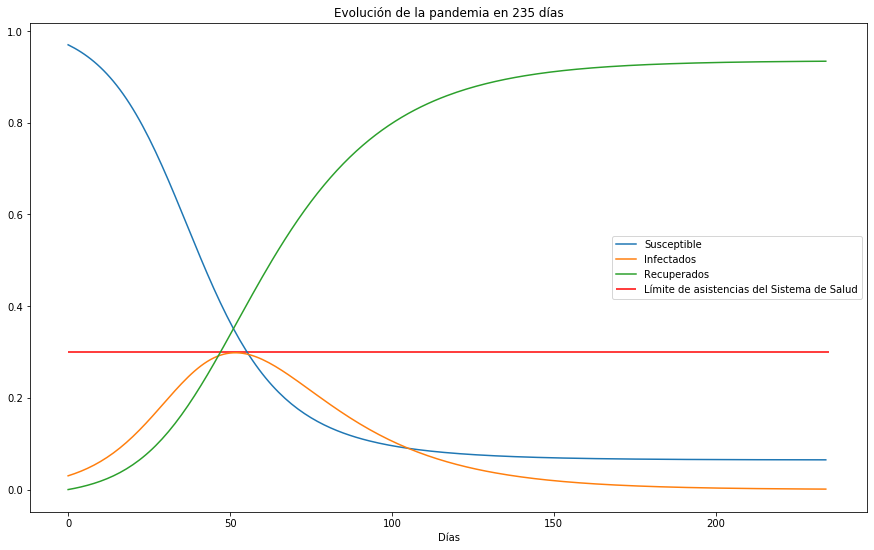

In [429]:
plt.figure(figsize=(15, 9))
plt.title('Evolución de la pandemia en {} días'.format(tiempoBeta))
plt.plot(susceptiblesBeta)
plt.plot(infectadosBeta)
plt.plot(recuperadosBeta)
plt.hlines(0.3, 0, tiempoBeta, colors='r', linestyles='solid', label='Límite de asistencia del sistema de salud')
plt.legend(['Susceptible', 'Infectados', 'Recuperados', 'Límite de asistencias del Sistema de Salud'])
plt.xlabel('Días')
plt.show()

In [430]:
max(infectadosBeta)

0.29836376181225227

In [431]:
susceptiblesBeta[tiempoBeta - 1] * 100

6.483469540332266

Modificando el valor de β a 0.123 se nota que el pico máximo de infectados (29.8% aproximadamente) no supera la capacidad máxima del sistema de salud.\
Si bien este nuevo valor de β aplanó la curva de infectados de modo tal que no supere la capacidad máxima del sistema de salud, también hizo que la duración de la pandemia pase de 178 días a 235.\
Por otro lado, hubo alrededor de un 6% de la población que no contrajo la enfermedad.

### Tomando medidas para reducir la cantidad de población susceptible a contraer la enfermedad.
En este apartado se supone que existe una vacuna para causar inmunidad en los individuos de la poblacion y que a partir de esta vacuna se implementa un calendario de vacunación a fin de no saturar el sistema de salud.

In [432]:
simulacionR = modeloSIRSimular(0.645, infectados0, recuperados0, beta, gamma, infectadosMinimo)

susceptiblesR = simulacionR[1][0]
infectadosR = simulacionR[1][1]
recuperadosR = simulacionR[1][2]
tiempoR = simulacionR[0]

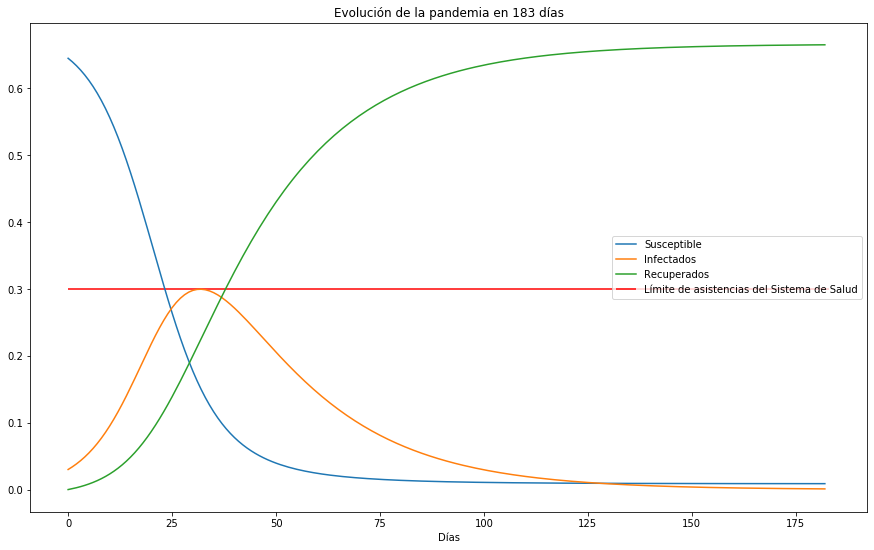

In [433]:
plt.figure(figsize=(15, 9))
plt.title('Evolución de la pandemia en {} días'.format(tiempoR))
plt.plot(susceptiblesR)
plt.plot(infectadosR)
plt.plot(recuperadosR)
plt.hlines(0.3, 0, tiempoR, colors='r', linestyles='solid', label='Límite de asistencia del sistema de salud')
plt.legend(['Susceptible', 'Infectados', 'Recuperados', 'Límite de asistencias del Sistema de Salud'])
plt.xlabel('Días')
plt.show()

In [434]:
max(infectadosR)

0.2996138629990319

Modificando el valor de la población susceptible a contraer la enfermedad a un 64.5% se logra que el pico máximo de infectados (29.9% aproximadamente) no supera la capacidad máxima del sistema de salud.\
Si bien no se satura el sistema de salud, podemos notar que la duración de la pandemia en este casi es de 6 días mas que la pandemia con los parámetros originales.

In [435]:
susceptiblesR[tiempoR - 1] * 100

0.8829902711351265